# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Read In SAT & ACT Data Code:
sat_2017_csv = '../data/sat_2017.csv'
sat = pd.read_csv(sat_2017_csv)

act_2017_csv = '../data/act_2017.csv'
act = pd.read_csv(act_2017_csv)
#salary = ath['Total Pay'].values.tolist()

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [4]:
act.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The data contains the SAT and ACT scores in 2017 of each state and the national overall. It has the breakdown of the subtests and the composite/total score. The data also contains the participation rate of each state.

#### 4a. Does the data look complete? 

Answer: The first 10 rows did not contain any missing data field for both the datasets.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
print(sat.describe())
print(act.describe())

       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000
         English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.5250

Answer: 

There was the issue of a 'x' mistyped in the Wyoming composite ACT score, an SAT Math subscore out of range with a value of 52, and a typo where an ACT Sci subscore had a typo becoming very small.

The min and max scores for SAT subtests are 200 and 800 respectively. The min and max scores for the ACT composite score and subtests are 1 and 36 respectively. All data was within range and there was no missing values.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [6]:
#code
act.at[51, 'Composite'] = 20.2
sat.at[20, 'Math'] = 524
act.at[21, 'Science'] = 23.8

#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [8]:
#code
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: ACT Composite score and the ACT/SAT Participation rates are object types rather than float types.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
#code
def convert_Participation(df):
    df['Participation'] = df['Participation'].str.replace('%','')
    df[['Participation']] = df[['Participation']].apply(pd.to_numeric)
    return df

sat = convert_Participation(sat)
act = convert_Participation(act)

- Fix any individual values preventing other columns from being the appropriate type.

In [10]:
#code
# Fixed in 4c

- Finish your data modifications by making sure the columns are now typed appropriately.

In [11]:
#code
act[['Composite']] = act[['Composite']].apply(pd.to_numeric)

- Display the data types again to confirm they are correct.

In [12]:
#Code:
print(sat.dtypes)
print(act.dtypes)

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [13]:
#code
sat.columns = ['state','participation_sat_2017','readwrite_sat_2017','math_sat_2017','total_sat_2017']
act.columns = ['state','participation_act_2017','english_act_2017','math_act_2017','read_act_2017','sci_act_2017','composite_act_2017']

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|The name of the state|
|participation_act_2017|int|ACT|The participation rate for ACT in 2017|
|english_act_2017|float|ACT|The average English subtest score for ACT in 2017|
|math_act_2017|float|ACT|The average Math subtest score for ACT in 2017|
|read_act_2017|float|ACT|The average Read subtest score for ACT in 2017|
|sci_act_2017|float|ACT|The average Science subtest score for ACT in 2017|
|composite_act_2017|float|ACT|The average Composite test score for ACT in 2017|
|participation_sat_2017|int|SAT|The participation rate for SAT in 2017|
|readwrite_sat_2017|int|SAT|The average Reading and Writing subtest score for SAT in 2017|
|math_sat_2017|int|SAT|The average Math subtest score for SAT in 2017|
|total_sat_2017|int|SAT|The average Total score for SAT in 2017|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [14]:
#code
act = act[act['state'] != 'National']

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [15]:
#Code:
combined = pd.merge(sat, act, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [16]:
#code
combined.to_csv('../data/combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [17]:
#Read In SAT & ACT Data:
sat_2018_csv = '../data/sat_2018.csv'
sat2 = pd.read_csv(sat_2018_csv)

act_2018_csv = '../data/act_2018.csv'
act2 = pd.read_csv(act_2018_csv)

#Check the data range:
print(sat2.describe())
print(act2.describe())

#Check the data types:
print(sat2.dtypes)
print(act2.dtypes)

#Rename the columns
sat2.columns = ['state','participation_sat_2018','readwrite_sat_2018','math_sat_2018','total_sat_2018']
act2.columns = ['state','participation_act_2018','english_act_2018','math_act_2018','read_act_2018','sci_act_2018','composite_act_2018']

       Participation  Evidence-Based Reading and Writing        Math  \
count      51.000000                           51.000000   51.000000   
mean       46.627451                          567.294118  557.254902   
std        38.014187                           45.317676   48.887562   
min         2.000000                          497.000000  480.000000   
25%         4.500000                          535.000000  521.500000   
50%        52.000000                          552.000000  547.000000   
75%        79.500000                          616.500000  600.500000   
max       100.000000                          643.000000  655.000000   

             Total  
count    51.000000  
mean   1124.666667  
std      93.868561  
min     977.000000  
25%    1062.500000  
50%    1099.000000  
75%    1220.000000  
max    1298.000000  
       Participation    English       Math    Reading    Science  Composite
count      51.000000  51.000000  51.000000  51.000000  51.000000  51.000000
mean      

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [18]:
final = pd.merge(combined, act2, on='state')

In [19]:
final = pd.merge(final, sat2, on='state')

In [20]:
final.to_csv('../data/final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [21]:
#Code:
final.describe().T

count         mean        std    min      25%     50%  \
participation_sat_2017   51.0    39.803922  35.276632    2.0     4.00    38.0   
readwrite_sat_2017       51.0   569.117647  45.666901  482.0   533.50   559.0   
math_sat_2017            51.0   556.882353  47.121395  468.0   523.50   548.0   
total_sat_2017           51.0  1126.098039  92.494812  950.0  1055.50  1107.0   
participation_act_2017   51.0    65.254902  32.140842    8.0    31.00    69.0   
english_act_2017         51.0    20.931373   2.353677   16.3    19.00    20.7   
math_act_2017            51.0    21.182353   1.981989   18.0    19.40    20.9   
read_act_2017            51.0    22.013725   2.067271   18.1    20.45    21.8   
sci_act_2017             51.0    21.462745   1.753392   18.2    19.95    21.3   
composite_act_2017       51.0    21.519608   2.020695   17.8    19.80    21.4   
participation_act_2018   51.0    61.647059  34.080976    7.0    28.50    66.0   
english_act_2018         51.0    20.988235   2.446356   16.6    19.10    20.2   
math_act_2018            51.0    21.125490   2.035765   17.8    19.40    20.7   
read_act_2018            51.0    22.015686   2.167245   18.0    20.45    21.6   
sci_act_2018             51.0    21.345098   1.870114   17.9    19.85    21.1   
composite_act_2018       51.0    21.486275   2.106278   17.7    19.95    21.3   
participation_sat_2018   51.0    46.627451  38.014187    2.0     4.50    52.0   
readwrite_sat_2018       51.0   567.294118  45.317676  497.0   535.00   552.0   
math_sat_2018            51.0   557.254902  48.887562  480.0   521.50   547.0   
total_sat_2018           51.0  1124.666667  93.868561  977.0  1062.50  1099.0   

                            75%     max  
participation_sat_2017    66.00   100.0  
readwrite_sat_2017       613.00   644.0  
math_sat_2017            599.00   651.0  
total_sat_2017          1212.00  1295.0  
participation_act_2017   100.00   100.0  
english_act_2017          23.30    25.5  
math_act_2017             23.10    25.3  
read_act_2017             24.15    26.0  
sci_act_2017              23.20    24.9  
composite_act_2017        23.60    25.5  
participation_act_2018   100.00   100.0  
english_act_2018          23.70    26.0  
math_act_2018             23.15    25.2  
read_act_2018             24.10    26.1  
sci_act_2018              23.05    24.9  
composite_act_2018        23.55    25.6  
participation_sat_2018    79.50   100.0  
readwrite_sat_2018       616.50   643.0  
math_sat_2018            600.50   655.0  
total_sat_2018          1220.00  1298.0

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [22]:
#code
# Funtion that creats a new list that contains only floats
def checklist(input_list):
    new_list=[]
    for i in input_list:
        try:
            new_list.append(float(i))
        except ValueError:
            continue
    return new_list

# Function that computes standard deviation
def stdev(input_list):
    num_list = checklist(input_list)
    n = len(num_list)
    if n <=1:
        print('Not enough numbers in list')
        pass
    else:
        avg = sum(num_list)/n
    
        summation = 0.0
        for i in num_list:
            summation += (i - avg)**2
    
        s = (summation/(n-1))**0.5
        return s

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [23]:
#Code:
final_wo_state = final.drop(columns='state')
sd = {str(s):stdev(final_wo_state[s].tolist()) for s in list(final_wo_state)}
sd

{'participation_sat_2017': 35.276632270013046,
 'readwrite_sat_2017': 45.66690138768932,
 'math_sat_2017': 47.12139516560329,
 'total_sat_2017': 92.49481172519046,
 'participation_act_2017': 32.14084201588683,
 'english_act_2017': 2.35367713980303,
 'math_act_2017': 1.9819894936505533,
 'read_act_2017': 2.0672706264873146,
 'sci_act_2017': 1.7533922304280611,
 'composite_act_2017': 2.020694891154341,
 'participation_act_2018': 34.08097623567245,
 'english_act_2018': 2.4463562339793055,
 'math_act_2018': 2.035764538177723,
 'read_act_2018': 2.1672445684804105,
 'sci_act_2018': 1.8701137639716146,
 'composite_act_2018': 2.1062781969951776,
 'participation_sat_2018': 38.0141872380898,
 'readwrite_sat_2018': 45.31767607353539,
 'math_sat_2018': 48.887562073498785,
 'total_sat_2018': 93.86856058695408}

In [24]:
sd_numpy = {str(s):np.std(final_wo_state[s].tolist()) for s in list(final_wo_state)}
sd_numpy

{'participation_sat_2017': 34.929070766645076,
 'readwrite_sat_2017': 45.21697020437866,
 'math_sat_2017': 46.65713364485504,
 'total_sat_2017': 91.58351056778743,
 'participation_act_2017': 31.824175751231806,
 'english_act_2017': 2.3304876369363368,
 'math_act_2017': 1.9624620273436781,
 'read_act_2017': 2.046902931484265,
 'sci_act_2017': 1.7361170088327353,
 'composite_act_2017': 2.0007860815819893,
 'participation_act_2018': 33.745194881997506,
 'english_act_2018': 2.4222536143202795,
 'math_act_2018': 2.0157072555557174,
 'read_act_2018': 2.1458918845104216,
 'sci_act_2018': 1.8516885484833538,
 'composite_act_2018': 2.0855261815801143,
 'participation_sat_2018': 37.63965409204986,
 'readwrite_sat_2018': 44.871185617623894,
 'math_sat_2018': 48.405899469194466,
 'total_sat_2018': 92.94372462792965}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The standard deviations computed manually and from pandas describe match, but numpy's std method resulted in minor difference.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [25]:
#code
variable = 'participation_sat_2018'
final.sort_values([variable,'state'], ascending=[0,1]).head(n=8)[['state',variable]]

state  participation_sat_2018
5      Colorado                     100
6   Connecticut                     100
7      Delaware                     100
12        Idaho                     100
22     Michigan                     100
13     Illinois                      99
19        Maine                      99
9       Florida                      97

- Which states have the highest participation rates for the:
    - 2017 SAT? District of Columbia, Michigan, Connecticut, Delaware    
    - 2018 SAT? Colorado, Connecticut, Delaware, Michigan, Idaho    
    - 2017 ACT? Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississipi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin    
    - 2018 ACT? Alabama, Arkansas, Kentucky, Louisiana, Mississipi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

- Which states have the lowest participation rates for the:
    - 2017 SAT? Iowa, Mississipi, North Dakota
    - 2018 SAT? Iowa, Mississipi, North Dakota
    - 2017 ACT? Maine
    - 2018 ACT? Maine

- Which states have the highest mean total/composite scores for the:
    - 2017 SAT? Minnesota, Wisconsin, Iowa	
    - 2018 SAT? Minnesota, Wisconsin, North Dakota
    - 2017 ACT? Connecticut, Massachusetts, New Hempshire
    - 2018 ACT? Connecticut, Massachusetts, New Hempshire

- Which states have the lowest mean total/composite scores for the:
    - 2017 SAT? District of Columbia, Delaware
    - 2018 SAT? District of Columbia, Delaware, West Virginia
    - 2017 ACT? Nevada, Mississippi, South Carolina	
    - 2018 ACT? Nevada, South Carolina, Mississippi	

In [26]:
def who_changed(test, dataframe):
    perfect = dataframe.loc[dataframe['participation_'+test+'_2017']==100, 'state'].tolist()

    for i in perfect:
        if dataframe.loc[dataframe['state']==i, 'participation_'+test+'_2018'].values[0] != 100:
            print(i)

In [27]:
who_changed('sat',final)

District of Columbia


In [28]:
who_changed('act',final)

Colorado
Minnesota


- Do any states with 100% participation on a given test have a rate change year-to-year?

District of Columbia for SAT. Colorado and Minnesota for ACT.

In [29]:
final.columns

Index(['state', 'participation_sat_2017', 'readwrite_sat_2017',
       'math_sat_2017', 'total_sat_2017', 'participation_act_2017',
       'english_act_2017', 'math_act_2017', 'read_act_2017', 'sci_act_2017',
       'composite_act_2017', 'participation_act_2018', 'english_act_2018',
       'math_act_2018', 'read_act_2018', 'sci_act_2018', 'composite_act_2018',
       'participation_sat_2018', 'readwrite_sat_2018', 'math_sat_2018',
       'total_sat_2018'],
      dtype='object')

In [30]:
halfplus_2017 = final.loc[(final['participation_act_2017']>50) & (final['participation_sat_2017']>50), 'state']
halfplus_2018 = final.loc[(final['participation_act_2018']>50) & (final['participation_sat_2018']>50), 'state']

print(halfplus_2017)
print(halfplus_2018)

9     Florida
10    Georgia
11     Hawaii
Name: state, dtype: object
9            Florida
10           Georgia
11            Hawaii
33    North Carolina
40    South Carolina
Name: state, dtype: object


- Do any states show have >50% participation on *both* tests either year?

In 2017, Florida, Georgia and Hawaii showed >50% participation.
In 2018, Florida, Georgia, Hawaii, North and South Carolina showed >50% participation.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Correlation Matrix of Variables')

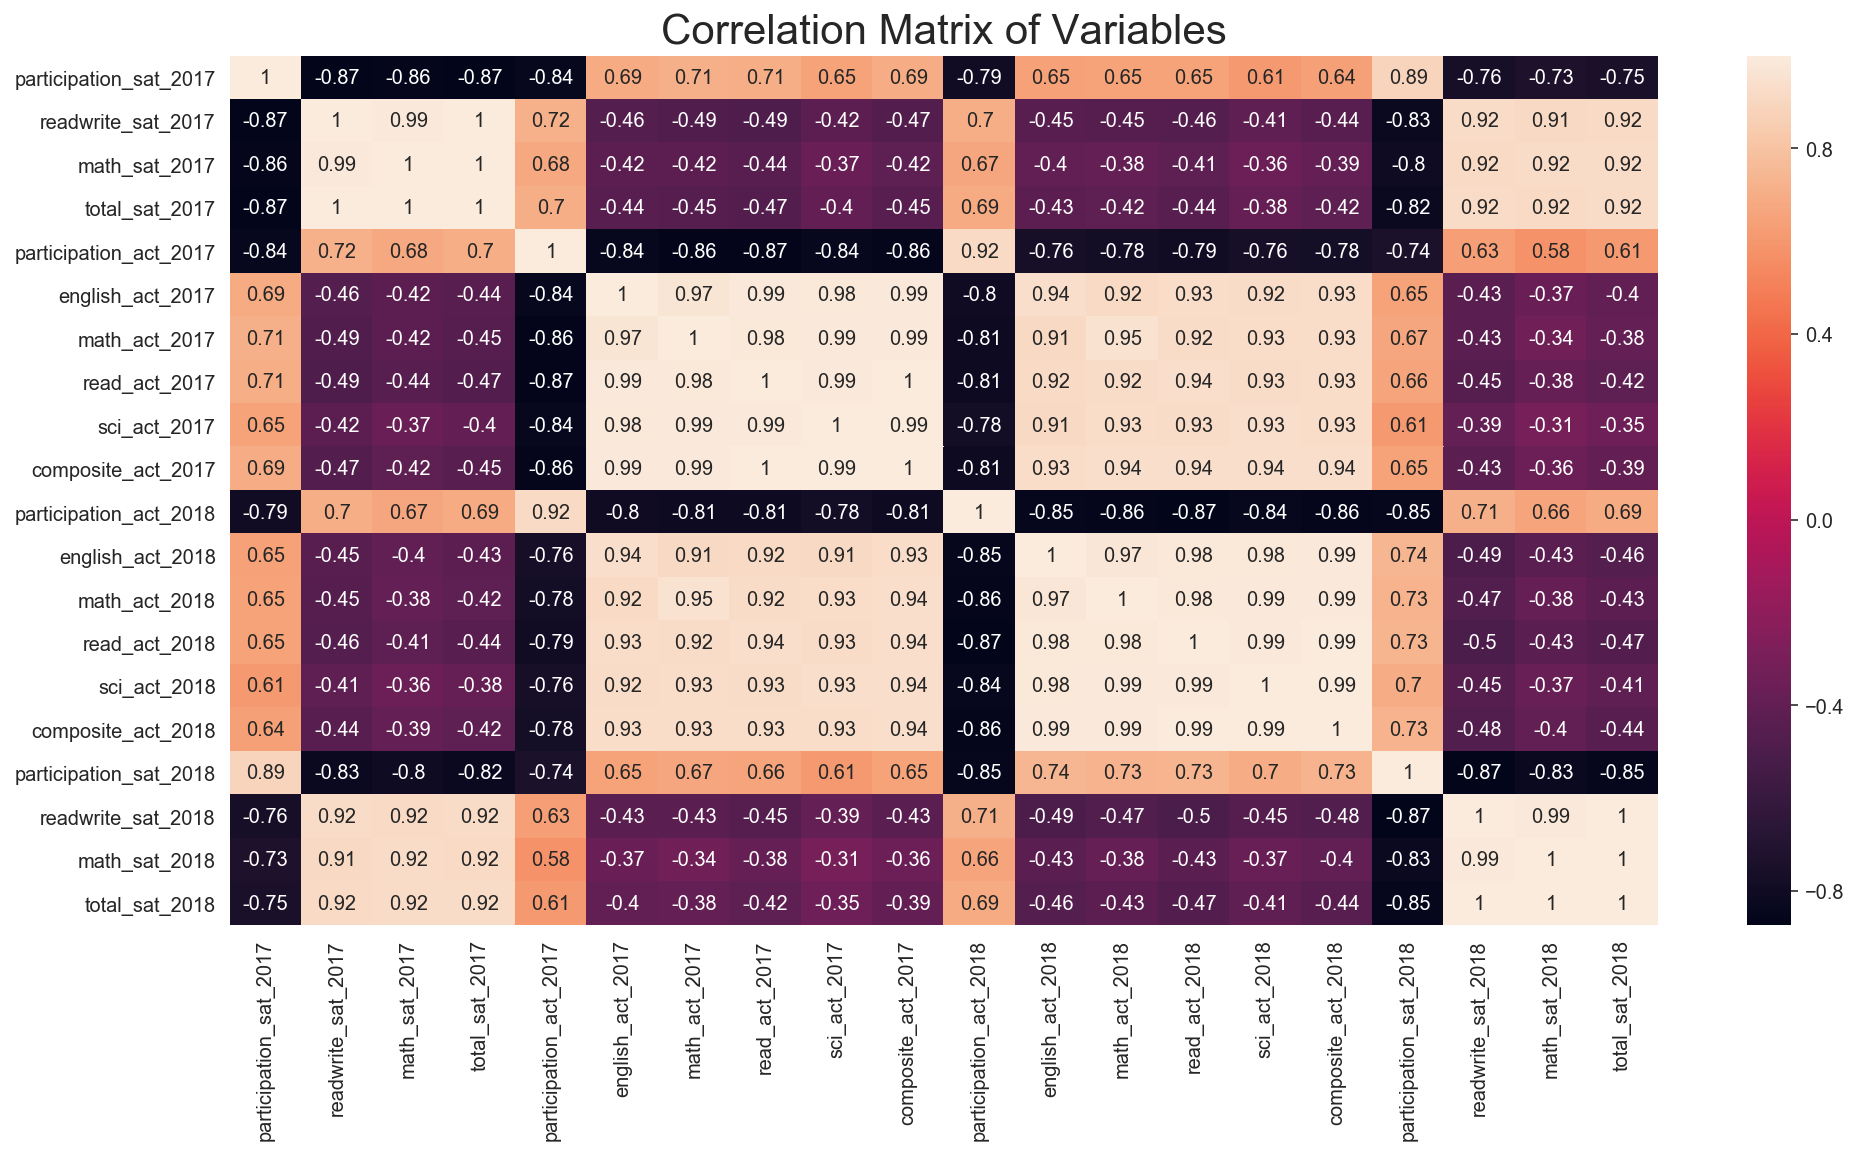

In [31]:
fig = plt.subplots(figsize=(16,8))
ax = sns.heatmap(final.corr(), annot=True)
ax.set_title('Correlation Matrix of Variables', fontsize=21)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [32]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    hist_row = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(hist_row,2,figsize=(16,8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=21, y=1.01) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=21, y=1.01)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

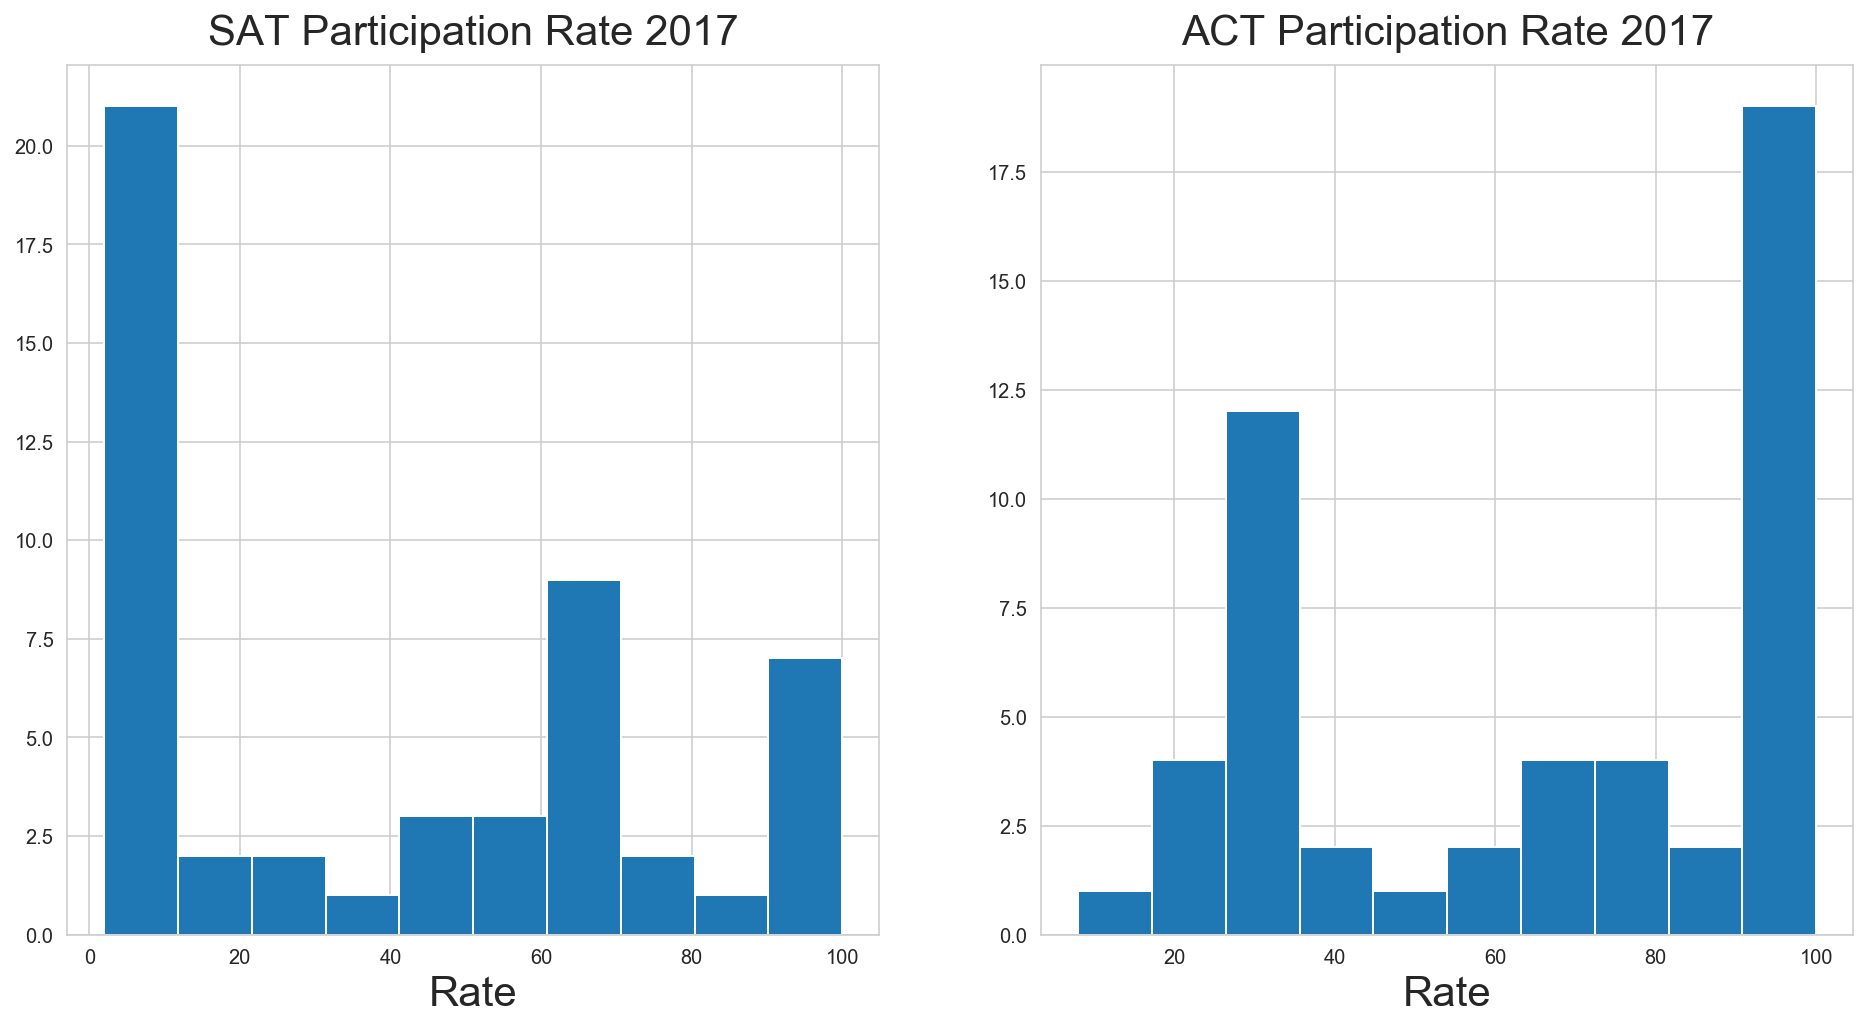

In [33]:
# Code
subplot_histograms(final, ['participation_sat_2017','participation_act_2017'], ['SAT Participation Rate 2017', 'ACT Participation Rate 2017'],['Rate', 'Rate'])

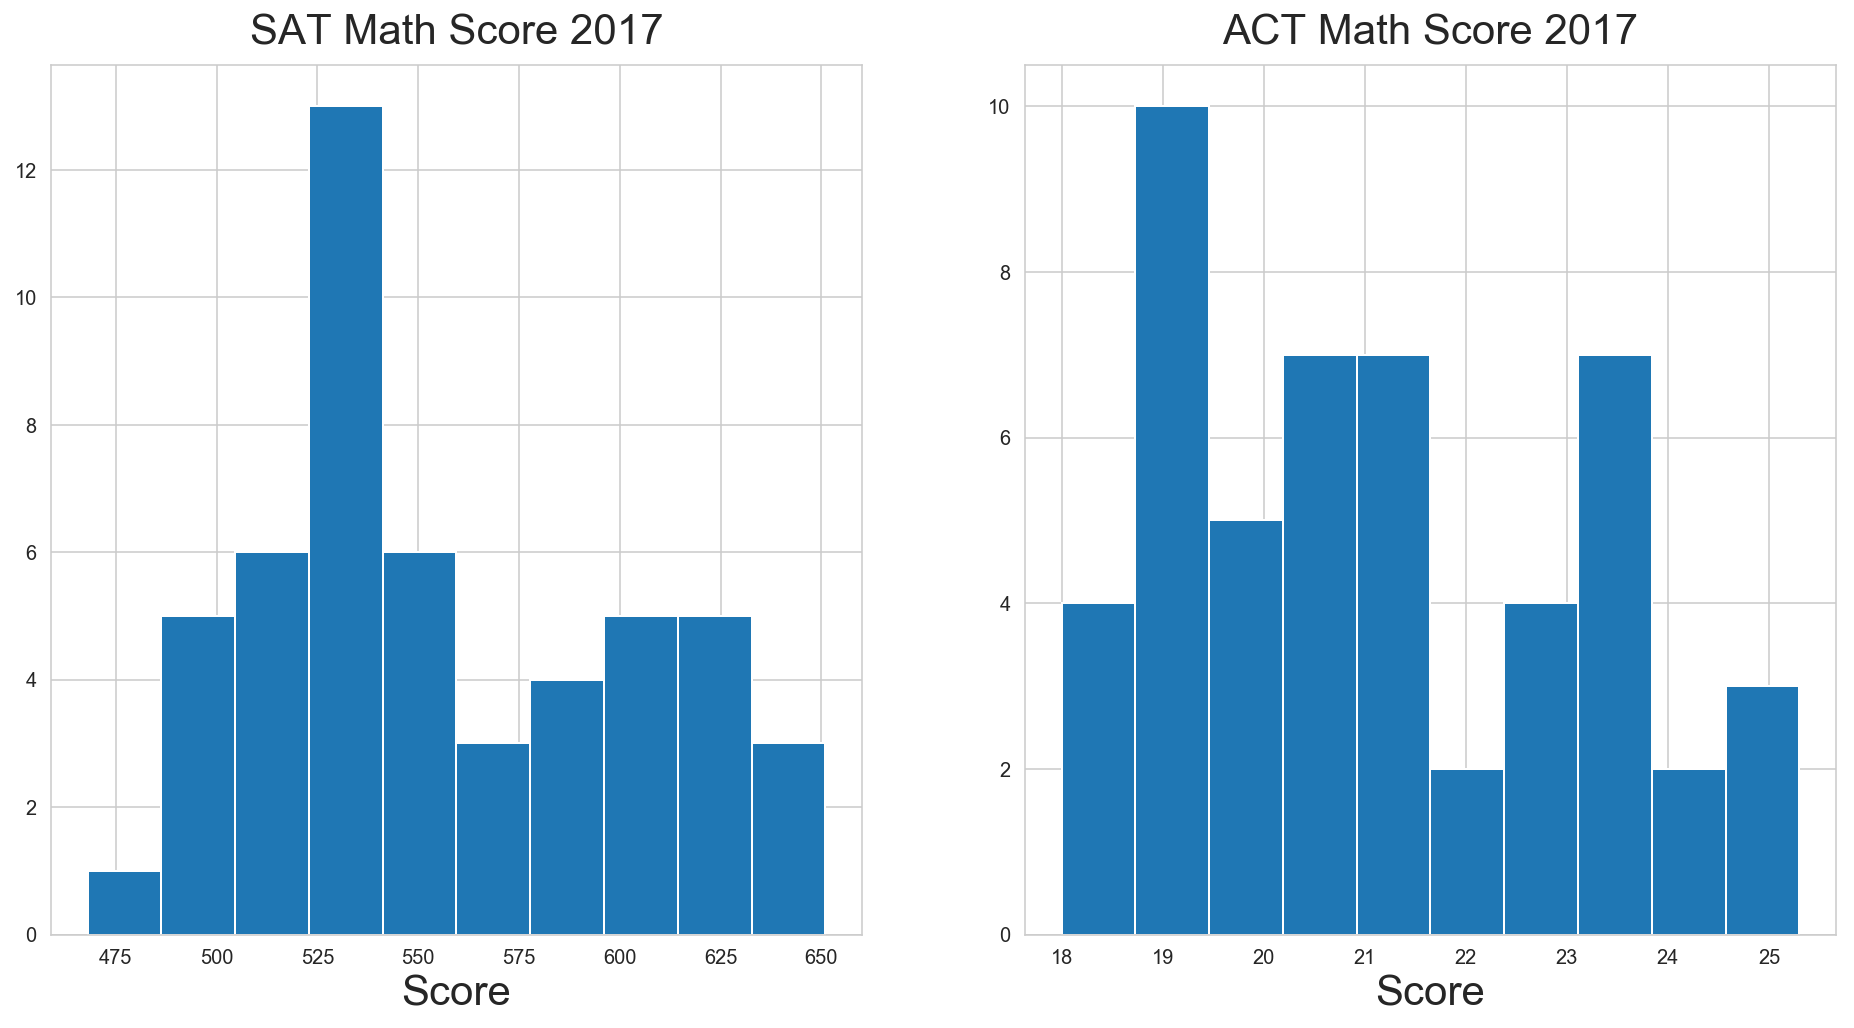

In [34]:
subplot_histograms(final, ['math_sat_2017','math_act_2017'], ['SAT Math Score 2017', 'ACT Math Score 2017'],['Score', 'Score'])

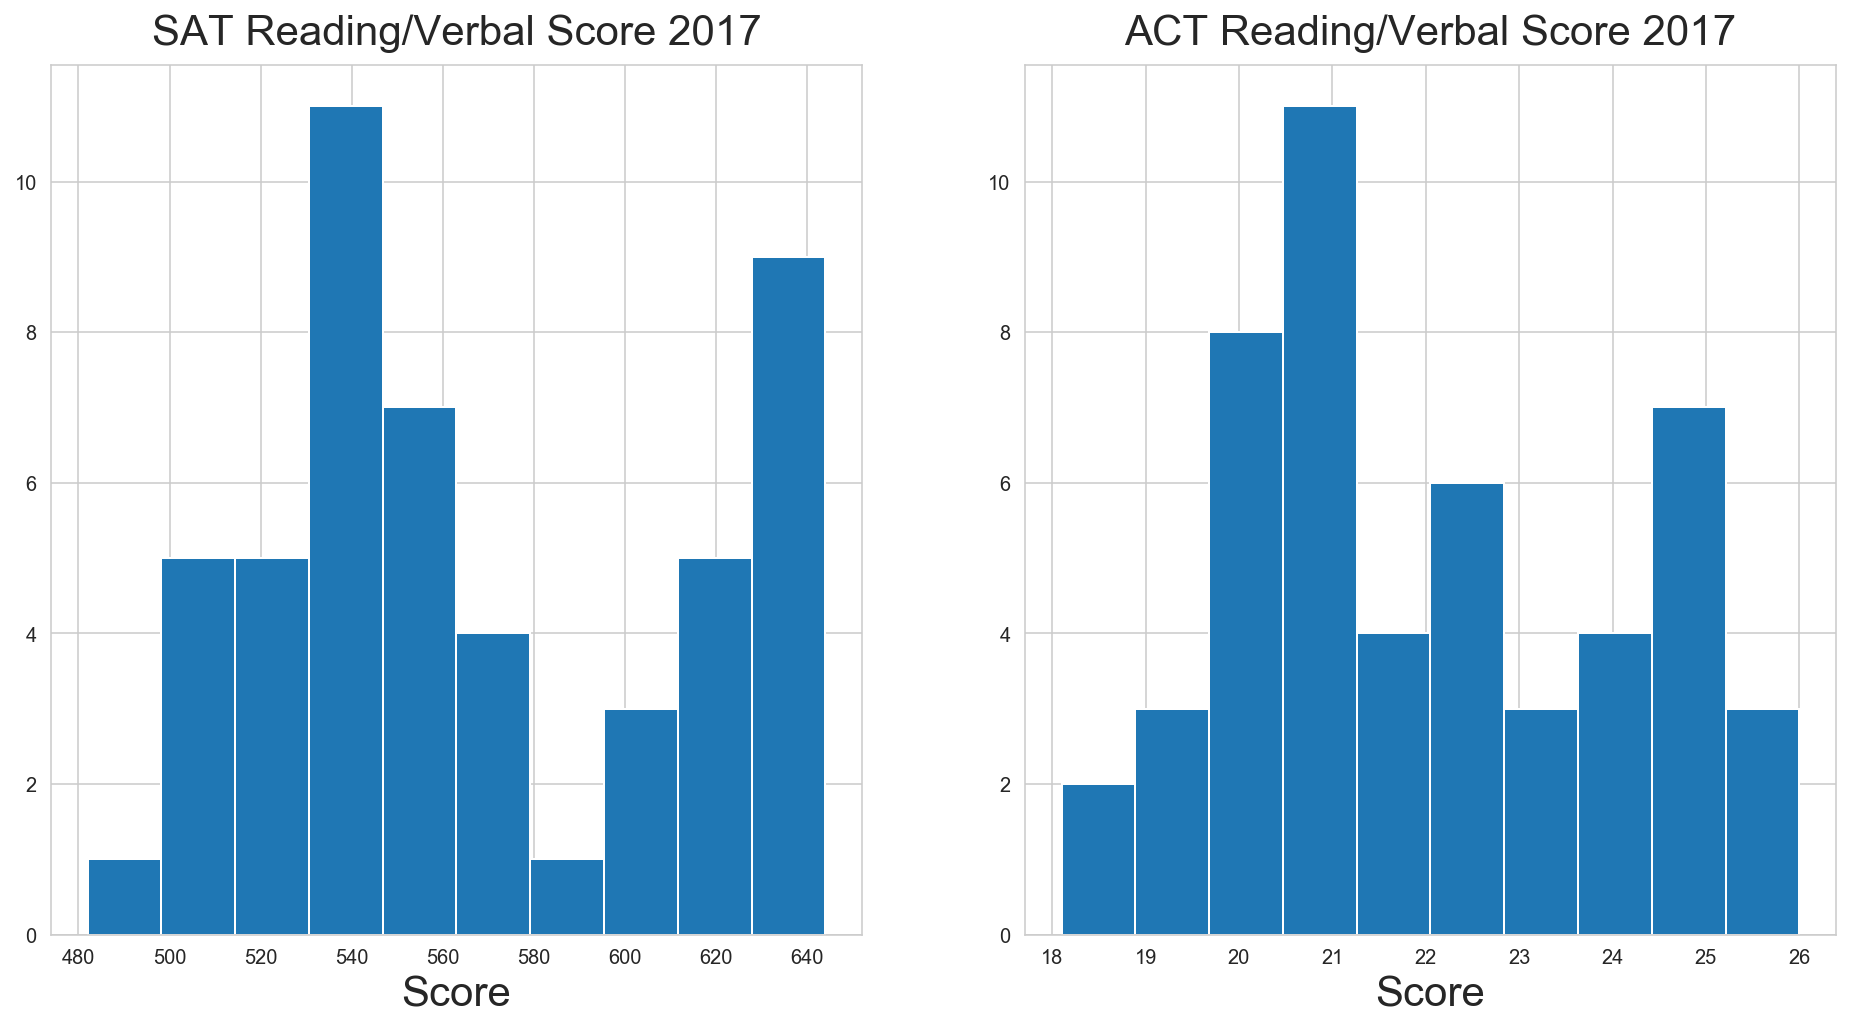

In [35]:
subplot_histograms(final, ['readwrite_sat_2017','read_act_2017'], ['SAT Reading/Verbal Score 2017', 'ACT Reading/Verbal Score 2017'],['Score', 'Score'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


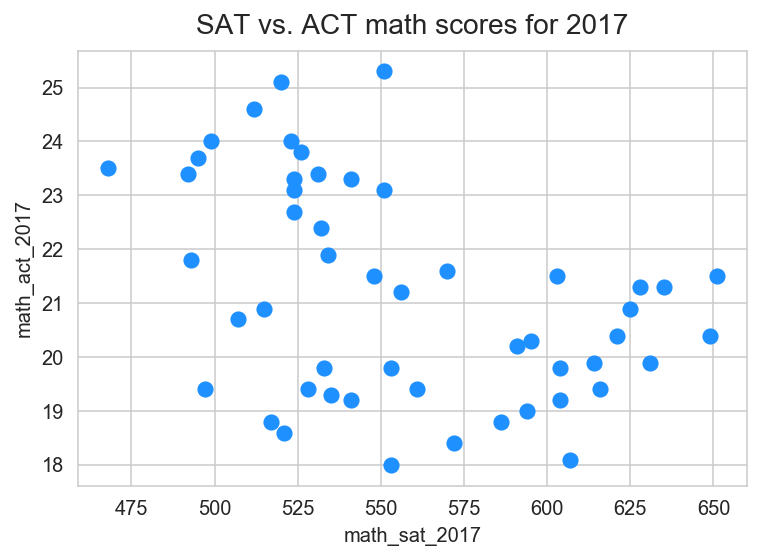

In [36]:
# Code
ax = final.plot(x='math_sat_2017', y='math_act_2017', kind='scatter', color='dodgerblue', s=50);
ax.set_title('SAT vs. ACT math scores for 2017', fontsize=14, y=1.01);

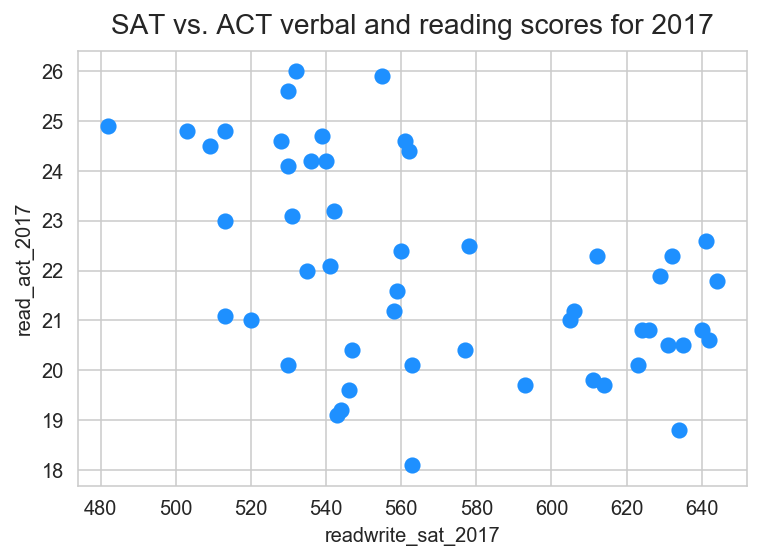

In [37]:
ax = final.plot(x='readwrite_sat_2017', y='read_act_2017', kind='scatter', color='dodgerblue', s=50);
ax.set_title('SAT vs. ACT verbal and reading scores for 2017', fontsize=14, y=1.01);

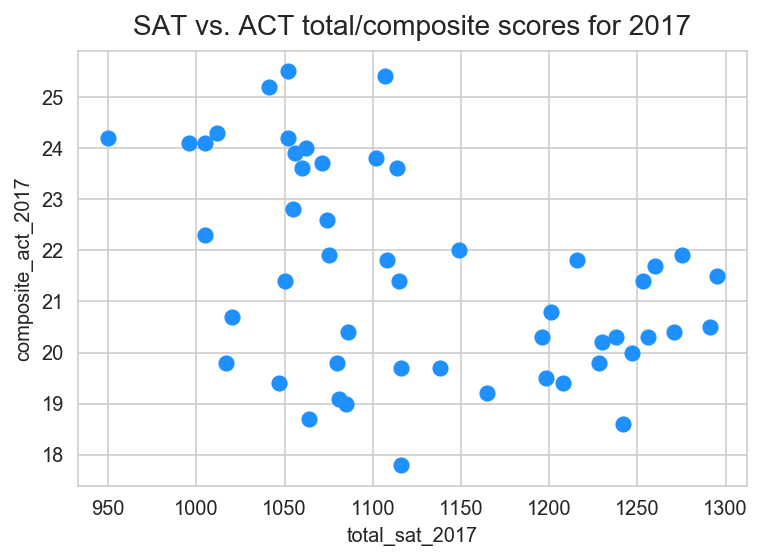

In [38]:
ax = final.plot(x='total_sat_2017', y='composite_act_2017', kind='scatter', color='dodgerblue', s=50);
ax.set_title('SAT vs. ACT total/composite scores for 2017', fontsize=14, y=1.01);

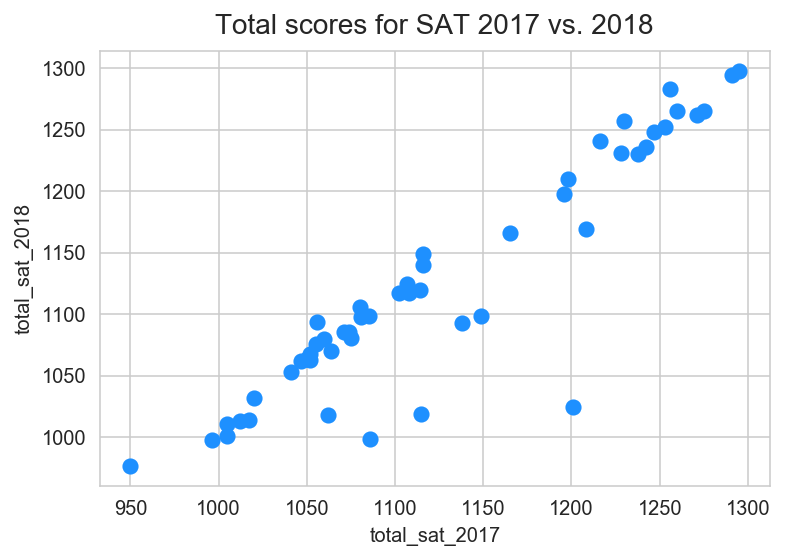

In [39]:
# Code
ax = final.plot(x='total_sat_2017', y='total_sat_2018', kind='scatter', color='dodgerblue', s=50);
ax.set_title('Total scores for SAT 2017 vs. 2018', fontsize=14, y=1.01);

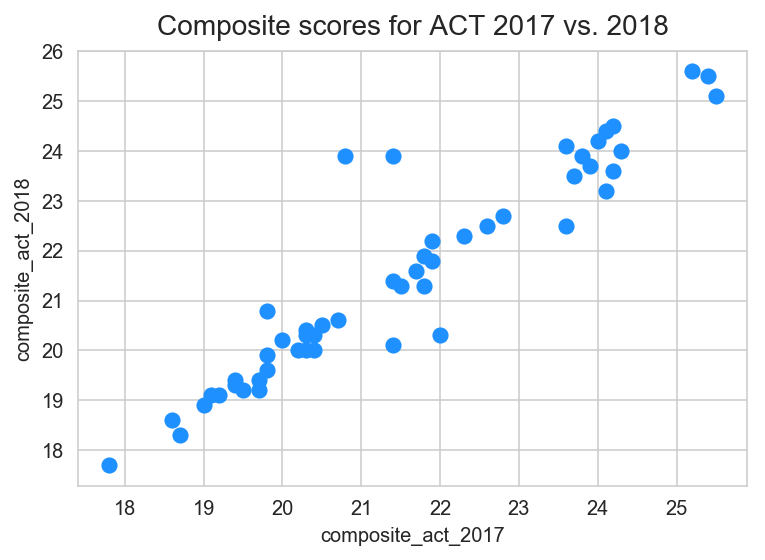

In [40]:
ax = final.plot(x='composite_act_2017', y='composite_act_2018', kind='scatter', color='dodgerblue', s=50);
ax.set_title('Composite scores for ACT 2017 vs. 2018', fontsize=14, y=1.01);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

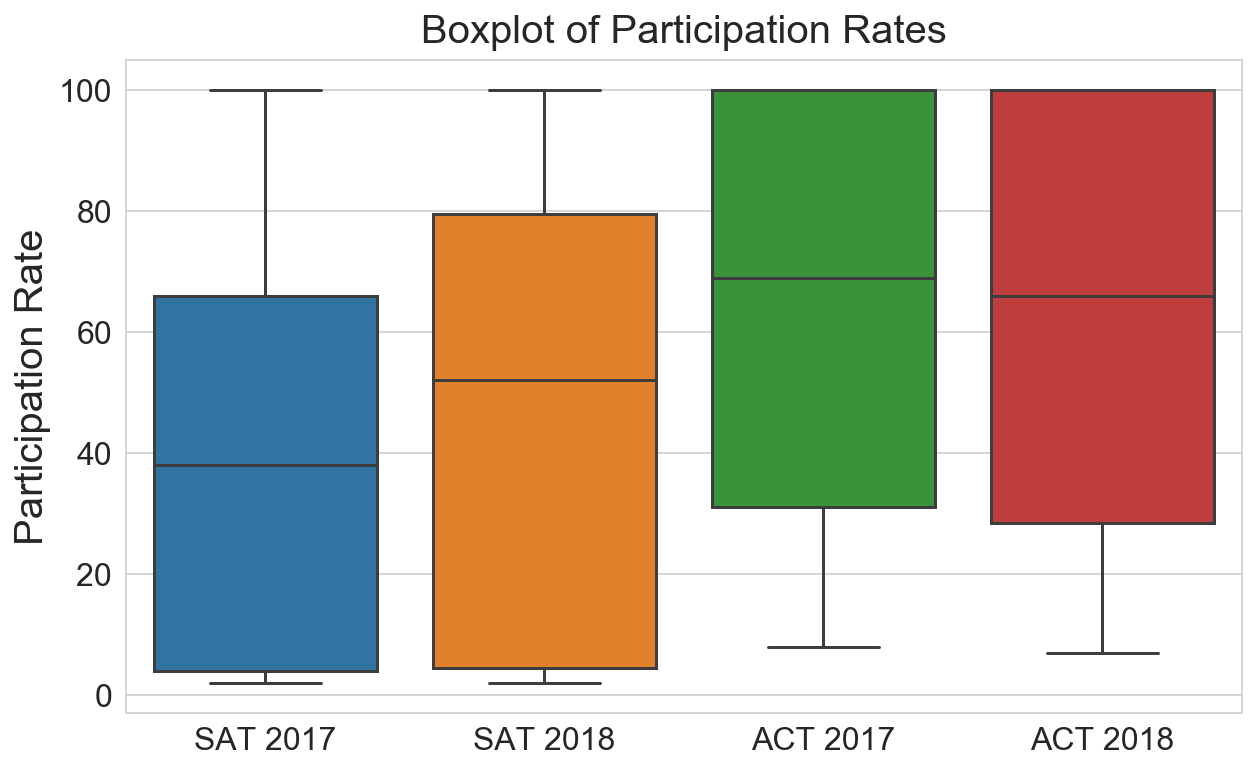

In [41]:
# Boxplot of participation rates
final_extract = final[['state','participation_sat_2017','participation_sat_2018','participation_act_2017','participation_act_2018']]
final_l=pd.melt(final_extract,id_vars=['state'],var_name='metric', value_name='rate')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="metric", y="rate", data=final_l)
ax.set_title('Boxplot of Participation Rates', fontsize=20, y=1.01);
ax.set_xticklabels(['SAT 2017','SAT 2018','ACT 2017','ACT 2018']);
ax.set_ylabel('Participation Rate',fontsize=20);
ax.set_xlabel('');
ax.tick_params(axis='both', which='major', labelsize=16)

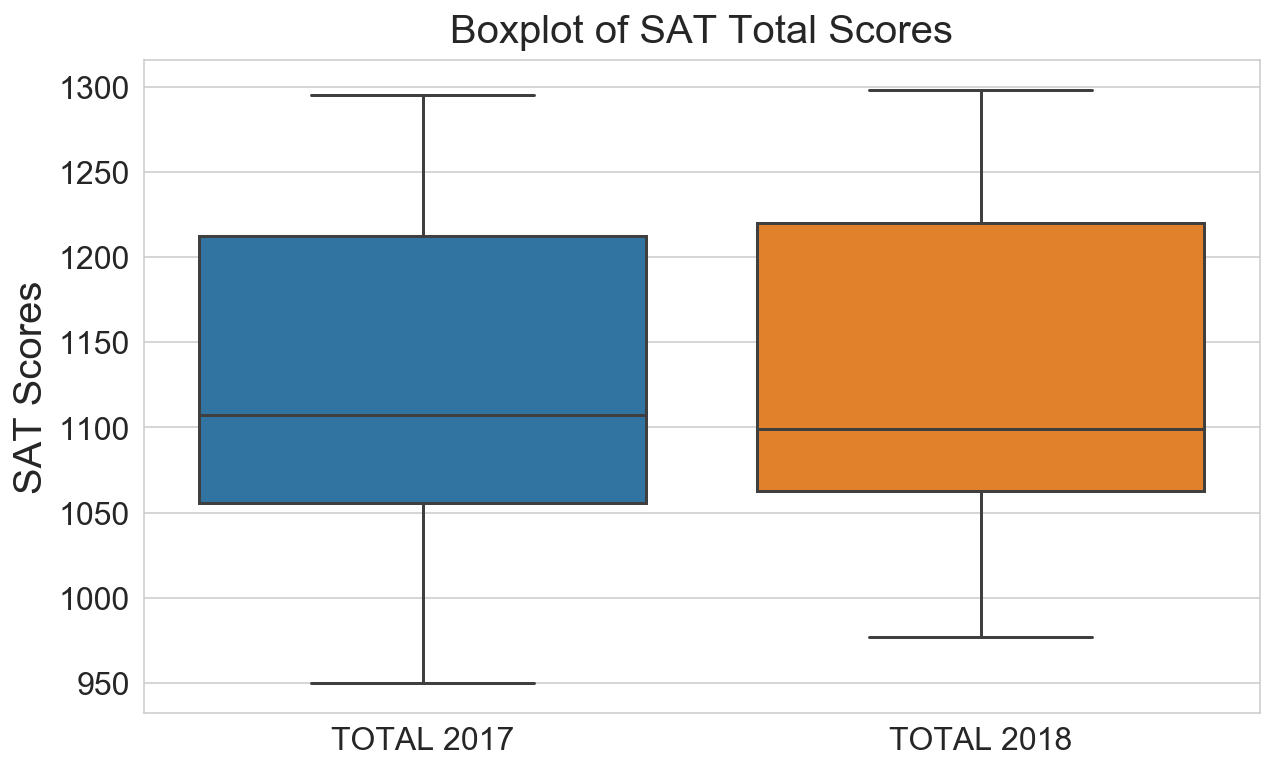

In [42]:
# Boxplot of SAT total scores
final_extract = final[['state','total_sat_2017','total_sat_2018']]
final_l=pd.melt(final_extract,id_vars=['state'],var_name='metric', value_name='rate')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="metric", y="rate", data=final_l)
ax.set_title('Boxplot of SAT Total Scores', fontsize=20, y=1.01);
ax.set_xticklabels(['TOTAL 2017','TOTAL 2018']);
ax.set_ylabel('SAT Scores',fontsize=20);
ax.set_xlabel('');
ax.tick_params(axis='both', which='major', labelsize=16)

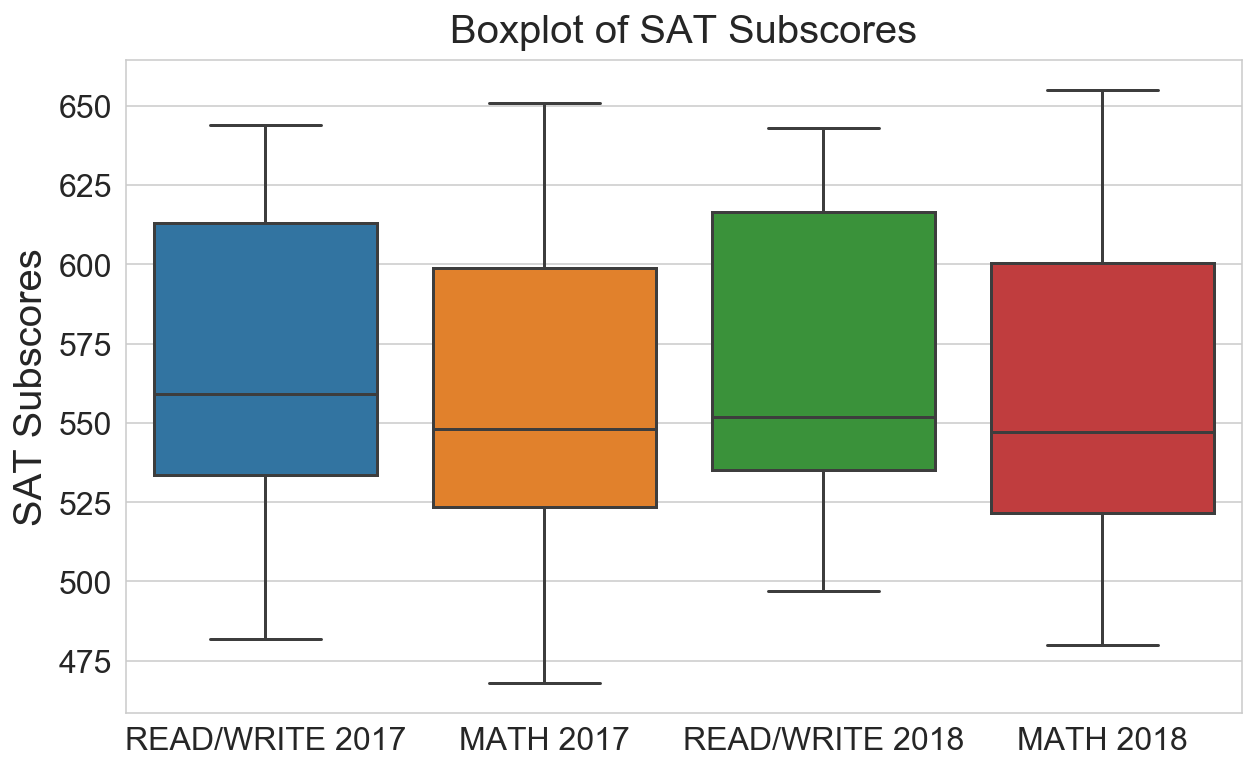

In [43]:
# Boxplot of SAT subscores
final_extract = final[['state','readwrite_sat_2017',
       'math_sat_2017','readwrite_sat_2018',
       'math_sat_2018']]
final_l=pd.melt(final_extract,id_vars=['state'],var_name='metric', value_name='rate')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="metric", y="rate", data=final_l)
ax.set_title('Boxplot of SAT Subscores', fontsize=20, y=1.01);
ax.set_xticklabels(['READ/WRITE 2017','MATH 2017','READ/WRITE 2018','MATH 2018']);
ax.set_ylabel('SAT Subscores',fontsize=20);
ax.set_xlabel('');
ax.tick_params(axis='both', which='major', labelsize=16)

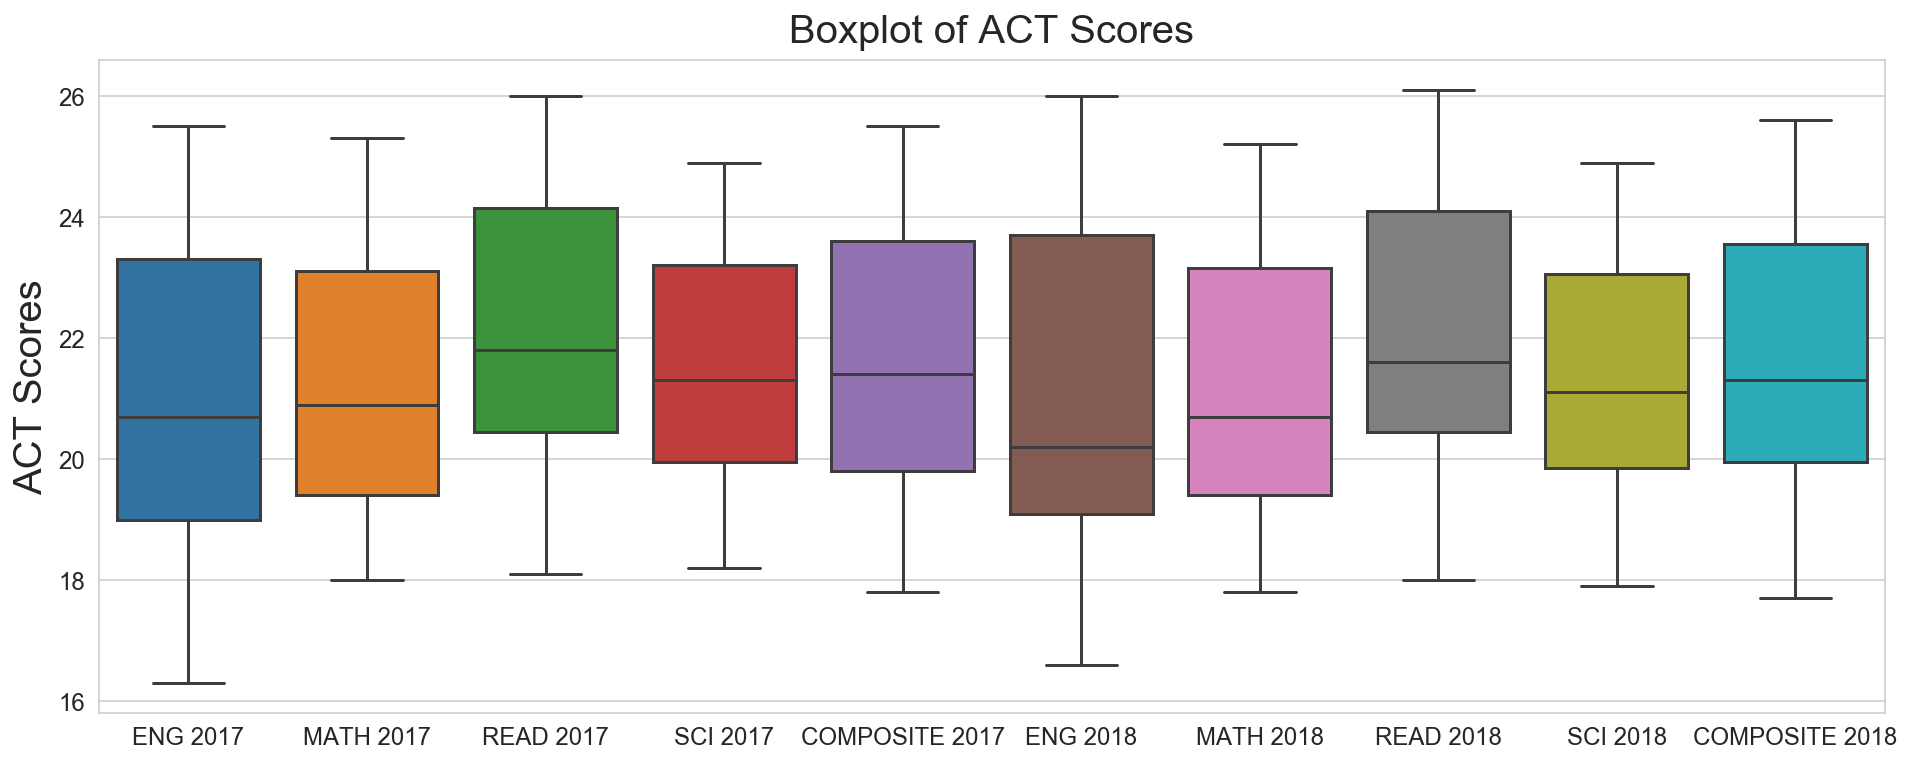

In [44]:
# Boxplot of ACT scores
final_extract = final[['state','english_act_2017', 'math_act_2017', 'read_act_2017', 'sci_act_2017',
                       'composite_act_2017','english_act_2018', 'math_act_2018', 'read_act_2018', 'sci_act_2018','composite_act_2018']]
final_l=pd.melt(final_extract,id_vars=['state'],var_name='metric', value_name='rate')

plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="metric", y="rate", data=final_l)
ax.set_title('Boxplot of ACT Scores', fontsize=20, y=1.01);
ax.set_xticklabels(['ENG 2017','MATH 2017','READ 2017','SCI 2017','COMPOSITE 2017',
                    'ENG 2018','MATH 2018','READ 2018','SCI 2018','COMPOSITE 2018']);
ax.set_ylabel('ACT Scores',fontsize=20);
ax.set_xlabel('');
ax.tick_params(axis='both', which='major', labelsize=12)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

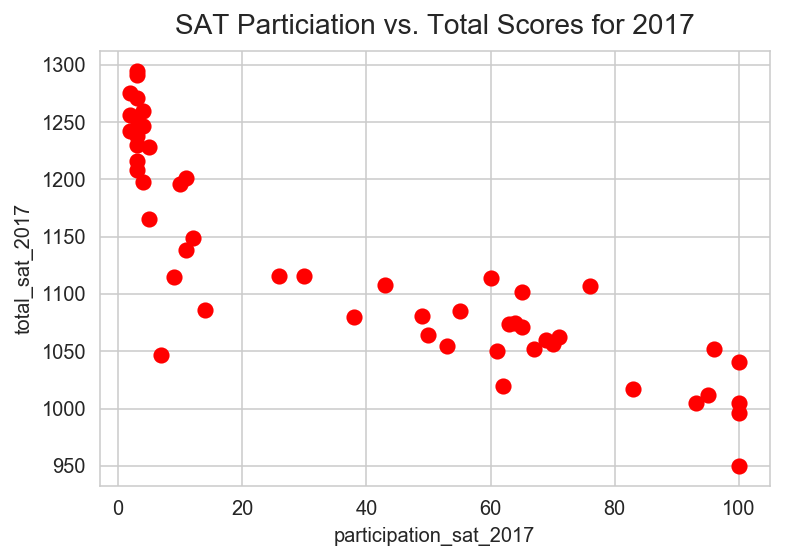

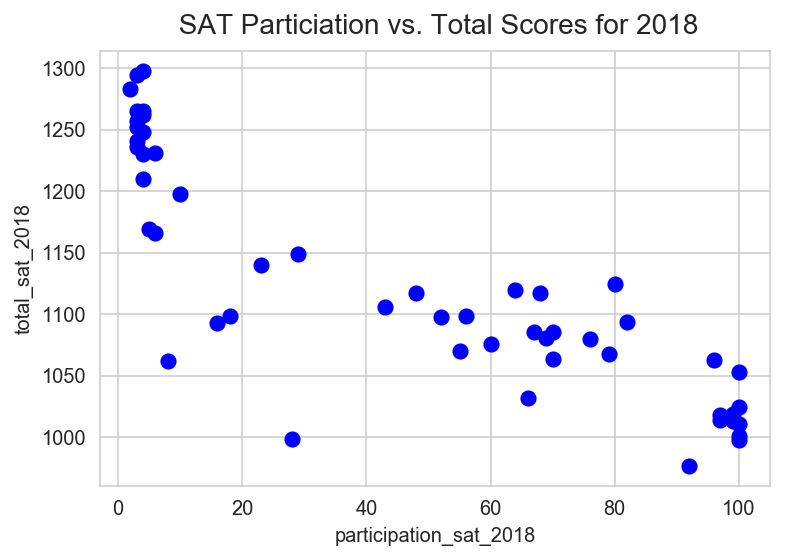

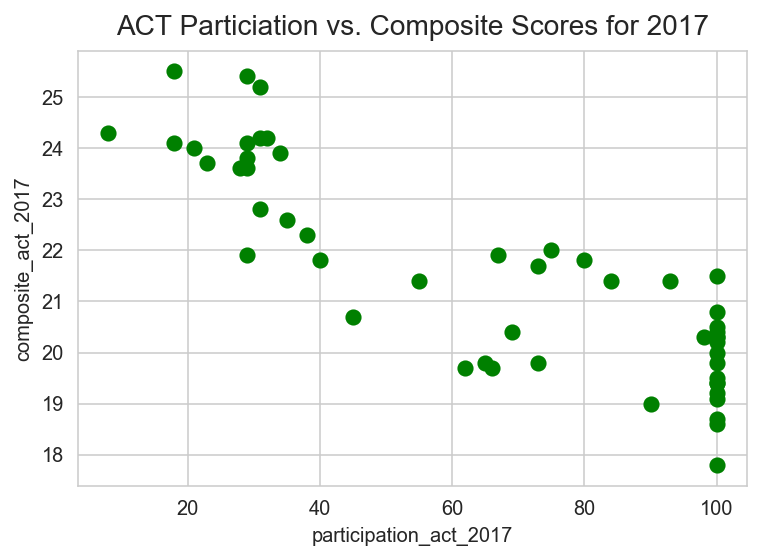

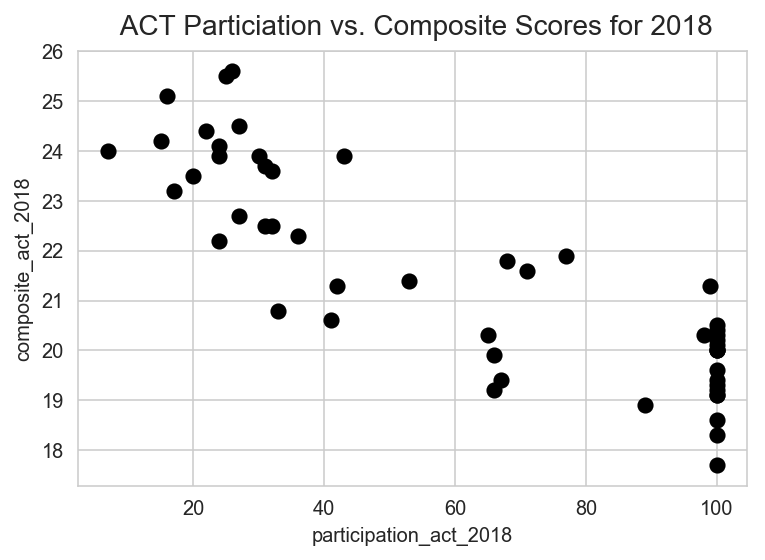

In [45]:
# Investigate the relationship between Participation Rate and Total/Composite Score
ax = final.plot(x='participation_sat_2017', y='total_sat_2017', kind='scatter', color='r', s=50);
ax.set_title('SAT Particiation vs. Total Scores for 2017', fontsize=14, y=1.01);

ax = final.plot(x='participation_sat_2018', y='total_sat_2018', kind='scatter', color='b', s=50);
ax.set_title(' SAT Particiation vs. Total Scores for 2018', fontsize=14, y=1.01);

ax = final.plot(x='participation_act_2017', y='composite_act_2017', kind='scatter', color='g', s=50);
ax.set_title('ACT Particiation vs. Composite Scores for 2017', fontsize=14, y=1.01);

ax = final.plot(x='participation_act_2018', y='composite_act_2018', kind='scatter', color='k', s=50);
ax.set_title(' ACT Particiation vs. Composite Scores for 2018', fontsize=14, y=1.01);

Based on the correlation matrix, we observe that the participation scores for each of the tests were inversly correlated to the pariticipation rates. Looking at the scatterplots, we confirm that this is true for most of the states for SAT scores, and the inverse correlation was not dues to outliers. For ACT scores, there were many states with high participation rates, where the scores had a higher variance. For states with low ACT participation rates, the scores were higher as the participation rates dropped. 

State-wide testing, or 100% participation, reasonably results in lower scores as it includes all seniors and not just those planning to apply to college. For states with low participation rates, it is likely that the particular test was optional and hence, only the most prepared, ambitious students would take the test. The testing population would have been more discerning as each test comes with a cost and states where tests were not mandatory would not have covered the cost for the students.

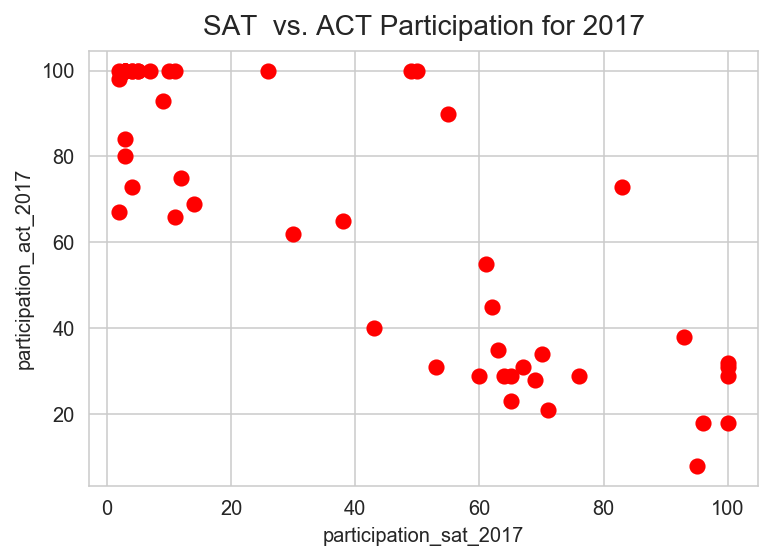

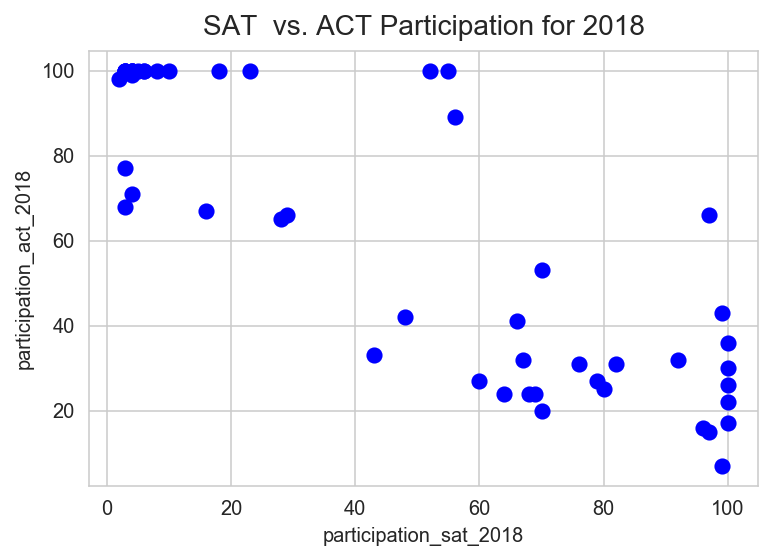

In [46]:
# Investigate the relationship between Participation Rates of ACT and SAT
ax = final.plot(x='participation_sat_2017', y='participation_act_2017', kind='scatter', color='r', s=50);
ax.set_title('SAT  vs. ACT Participation for 2017', fontsize=14, y=1.01);

ax = final.plot(x='participation_sat_2018', y='participation_act_2018', kind='scatter', color='b', s=50);
ax.set_title('SAT  vs. ACT Participation for 2018', fontsize=14, y=1.01);

SAT and ACT participation rates were inversely correlated. Looking at the scatterplots, we observe that states generally focus on one or the other. For those with high participation rate of one test, the participation rate of the other test does not exceed 80%.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

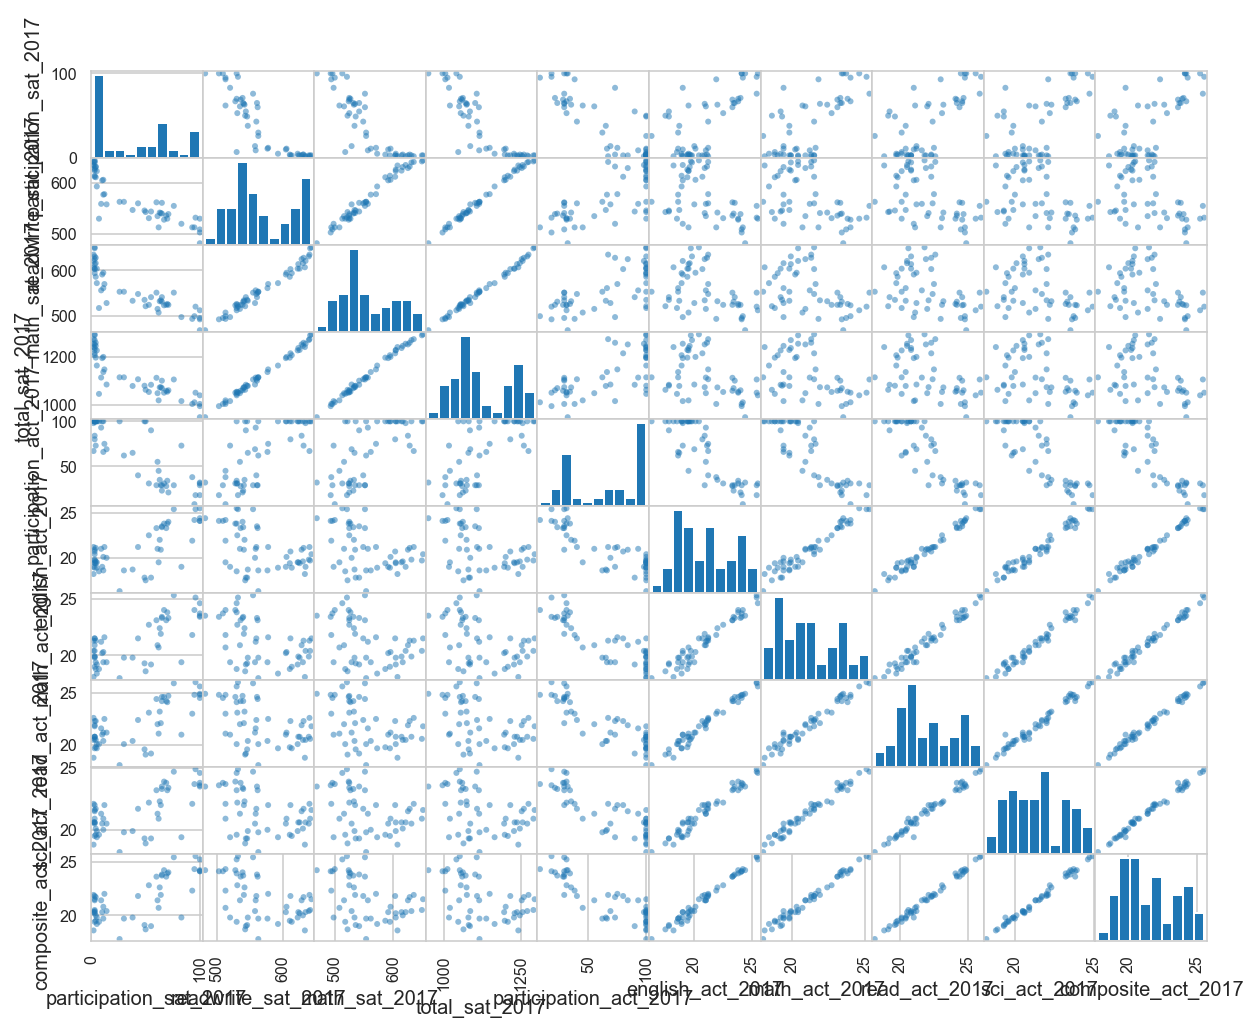

In [47]:
pd.plotting.scatter_matrix(final.iloc[:,0:11], figsize=(10, 8));

Answers:

SAT Participation - Right-skewed, trimodal with a second smaller peak at a higher participation rate and peaks at both the max and min values.

SAT Math - Slightly right-skewed

SAT Read/Write - Bimodal right-skewed

SAT Total - Bimodal as a result of the combination of the subtest distributions

ACT Participation - Left-skewed, bimodal with the highest peak at max and a second lower peak at 20% participation rate. 

ACT Subtest and Composite - Relatively evenly distributed, slightly left skewed.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
We didnt observe this trend.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: The assumptions did not hold for Reading and Rates as they had multiple peaks. For Math, it was closer to a normal distribution although it was slightly right-skewed.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No, because the distributions are not normal. It was not a random sampling as the populations were already seggregated by state which has different behavior when it came to test choice. There was no sampling as participation rate was measured for the whole population.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Yes, the distributions better resembled a normal distribution. Assuming that the distribution of math ability was not pre-seggregated by state, each state's population performance should be random. By central limit theorem, the distribution of the mean of random samples would be normal, even if the distribution of test scores distribution for each state might not be.  

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

I would run a paired t-test to investigate the changes in scores for each of the tests to investigate if the results between 2017 and 2018 have changed significantly. 

For each test/subtest, the null hypothesis would be that the means were no different between 2017 and 2018. The alternate hypothesis would be that they were different (for a two-tailed test) or that one was higher than the other (for a one-tailed test).

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Mississippi had one of the highest participation for ACT but the lowest for SAT. The participation rate was 100% as the state had made the ACT a mandatory part of their statewide testing regimens. This rendered the SAT test unecessary as students who have interest in college would have taken a college admission test in ACT.

On the contrary, Florida consistently had a participation rate of >50% for both years. This was because some schools or districts can administer the SAT or ACT to their students either as an option or a requirement in Florida. As a result, the participation of the population in either of the tests was split. For students wanting to increase their chances of college admission, both tests would have been taken so that the test with the higher score could be submitted for consideration. This could have resulted in the high participation rates for both tests, despite one or the other or both being optional in the schools. 

District of Columbia was chosen as it had the 100% SAT participation rate in 2017 but dropped slightly in 2018 to 92%. States with high, or even 100%, SAT participation rates were mostly because it was mandatory. At District of Columbia, although it was not mandatory, SAT was offered for free to all juniors and seniors, thereby increasing the access for low-income students as well. As the state had the lowest overall mean score, coupled with the test being optional, students/schools might have gotten more discerning in enrolling for the test, thus lowering the participation rate in 2018 perhaps when students who were not applying to college sat out.

References:

https://blog.prepscholar.com/which-states-require-the-sat

https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows

https://blog.prepscholar.com/average-sat-scores-by-state-most-recent



## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The key takeaways are:
- States have varying degrees of participation in each of the tests depending on thier state policies;
- Mandatory tests come at zero cost, with free study materials and extra preparation opportunities in school
- Higher participation rate generally results in lower scores and vice versa;
- SAT and ACT scores are not positively correlated, due to non-random, uneven sampling of the population as students taking the test when it is optional are likely a self-selected group that is well-prepared for the test.

Iowa was chosen for discussion as although both ACT and SAT tests are not mandatory in the state, the participation rate for ACT (67%) was way above that for SAT (3%). This shows a great opportunity for growth, via partnership with the state to make SAT way more accessible than ACT by introducing free tests and preparation materials to the schools. This will increase the access for low-income students, encourage those who were not planning for college to consider it and make the SAT test more appealing than their counterpart. 

Additional data to better inform the investigations would be student-level granularity of the data so as to deep-dive into the sub-groups within each state population and have a more meaningful comparison between both tests. 

In [48]:
final[final['state']=='Iowa']

state  participation_sat_2017  readwrite_sat_2017  math_sat_2017  \
15  Iowa                       2                 641            635   

    total_sat_2017  participation_act_2017  english_act_2017  math_act_2017  \
15            1275                      67              21.2           21.3   

    read_act_2017  sci_act_2017  ...  participation_act_2018  \
15           22.6          22.1  ...                      68   

    english_act_2018  math_act_2018  read_act_2018  sci_act_2018  \
15              21.0           21.2           22.5          22.0   

    composite_act_2018  participation_sat_2018  readwrite_sat_2018  \
15                21.8                       3                 634   

    math_sat_2018  total_sat_2018  
15            631            1265  

[1 rows x 21 columns]